In [1]:
import imageio
import cv2
import subprocess
import librosa
import librosa.display
import soundfile as sf
import os
import torch
from torchvision import transforms
from inference.Inferencer import Inferencer
from models.PasticheModel import PasticheModel
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from PIL import Image
from pathlib import Path
import tqdm.notebook as tq
import pandas as pd

pd.set_option('display.max_rows', 500)
from IPython.core.display import HTML, display
def rm_out_padding(): display(HTML("<style>div.output_subarea { padding:unset;}</style>"))
rm_out_padding()

In [52]:
audio_data = 'audio/disclosure.wav'
z, sr = librosa.load(audio_data, offset = 100, duration = 20)

In [53]:
harm, perc = librosa.effects.hpss(z)

In [54]:
hop_length = 735
Nfft = 2048
n_mels = 100
z = librosa.feature.melspectrogram(perc, sr=sr, n_fft=Nfft, hop_length=hop_length, n_mels=n_mels)
z= librosa.power_to_db(z)
z = (z - z.min()) / (z.max() - z.min())

In [55]:
def mel_grams(z):
    plt.figure(figsize=(15, 25))
    librosa.display.specshow(z,
                             x_axis="time",
                             y_axis="mel",
                             sr=sr,
                            hop_length=hop_length)
    plt.colorbar(format="%+2.f dB")
    plt.show()

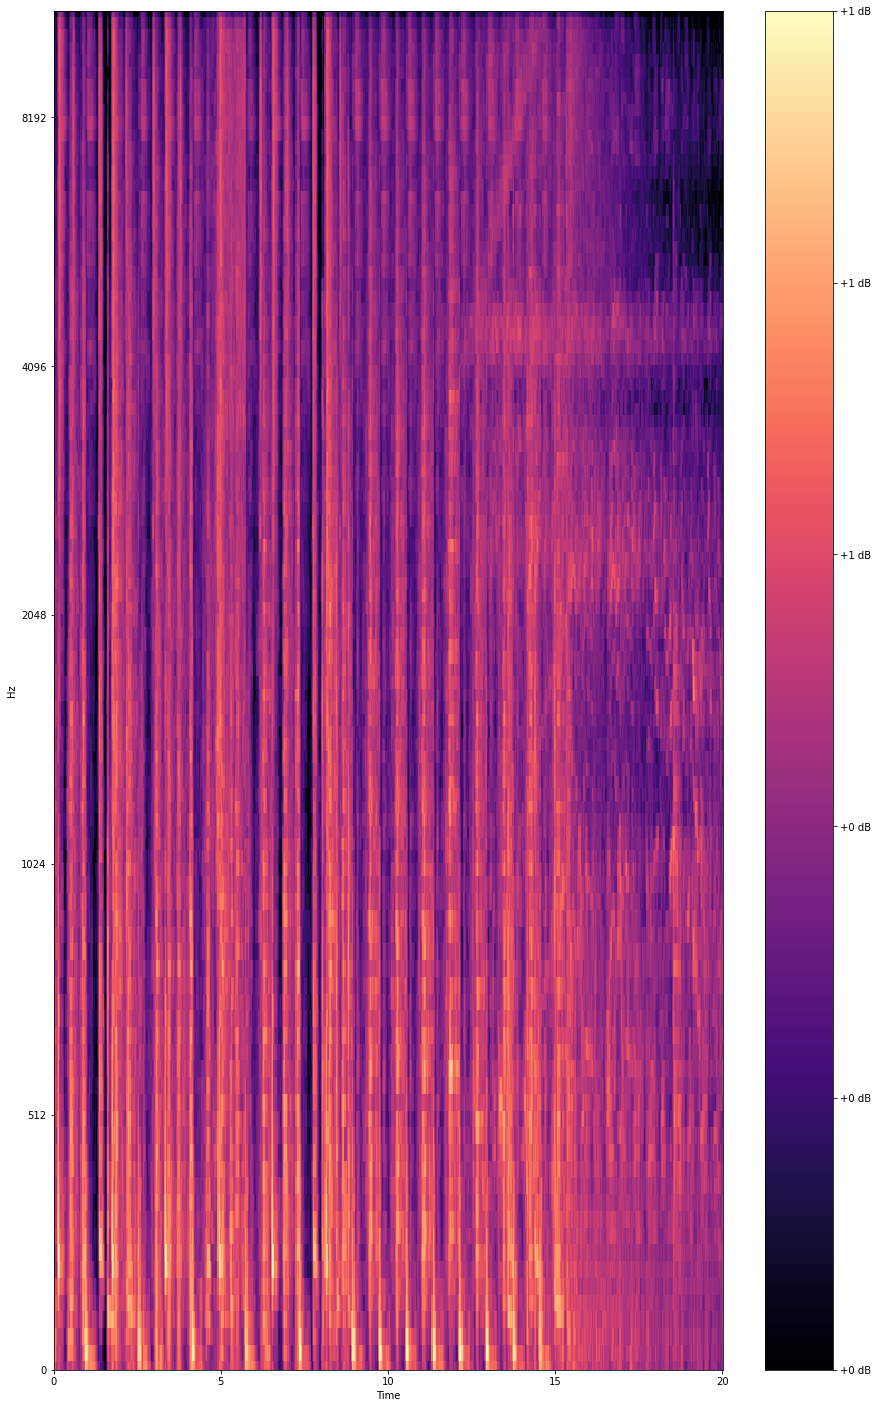

In [56]:
mel_grams(z)

In [36]:
s.shape

(100,)

In [40]:
print(s.argsort()[::-1][:5])

[ 1  7  6 15 42]


In [41]:
from scipy.ndimage import gaussian_filter

In [44]:
s.shape

(100,)

In [104]:
filt = gaussian_filter(z, sigma=[0, 2])
s = filt.std(axis=1)
print(s.argsort()[::-1][:5])

[84 35  1  7 37]


In [105]:
filt.shape

(100, 601)

In [106]:
def rolling_window(a, window):
    pad = np.ones(len(a.shape), dtype=np.int32)
    pad[-1] = window-1
    pad = list(zip(pad, np.zeros(len(a.shape), dtype=np.int32)))
    a = np.pad(a, pad,mode='reflect')
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [107]:
# rolling var along last axis
rol_std = np.var(rolling_window(filt, 150), axis=-1)

In [108]:
rol_std.shape

(101, 601)

In [109]:
amax = np.argmax(rol_std, axis=0)

In [110]:
print(amax)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 42 42 42 42 42 42 42 42 42  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 29 29 29 29 29 29 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31

In [111]:
print(amax.shape)

(601,)


In [112]:
beat = [z[a, i] for i, a in enumerate(amax)]

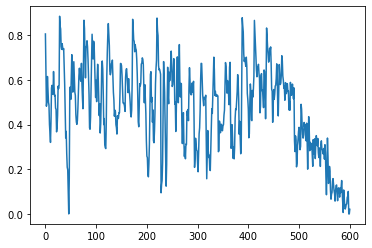

In [113]:
plt.plot(beat)
plt.show()

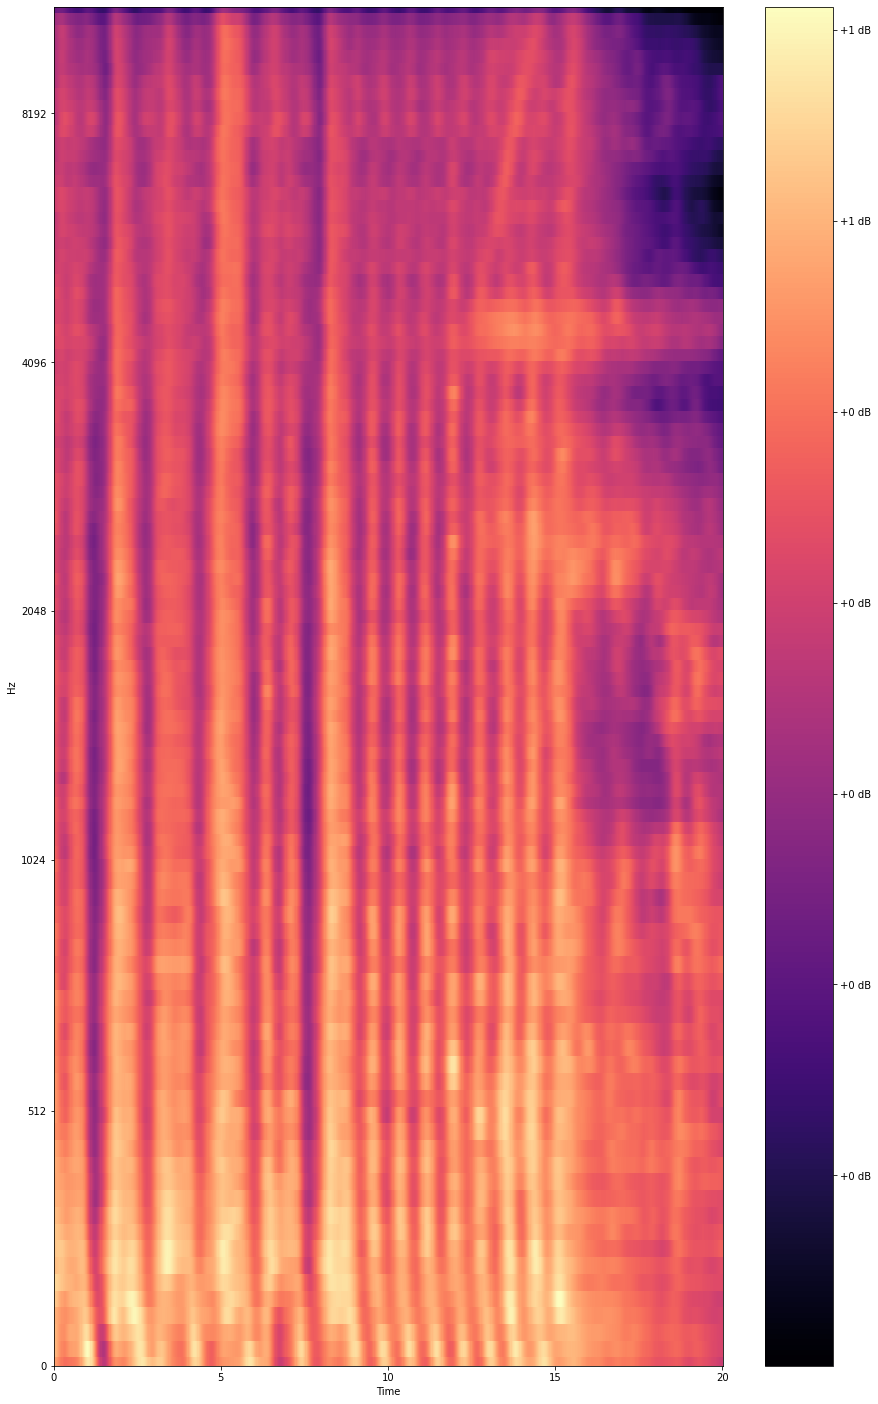

In [103]:
mel_grams(filt)